## **1. Загрузить любой набор данных с https://www.kaggle.com, подходящий к задачам классификации и регрессии (либо два набора - отдельно для каждой из задач).**

In [15]:
# с помощью pandas.get_dummies исправить булевые значения;
import pandas as pd
import numpy as np
df = pd.read_csv('diabetes_prediction_dataset.csv')[:2000]
df['gender'].replace(['Female','Male', 'Other'],[0,1, np.nan],inplace=True)
df.drop(columns=['smoking_history'],inplace=True)
df.dropna(inplace=True)
df = pd.get_dummies(df, columns = ['gender'])
vMin = df.min( axis = 0 )
x = (df - vMin) / (df.max( axis = 0 ) - vMin)
print(x)

           age  hypertension  heart_disease       bmi  HbA1c_level  \
0     1.000000           0.0            1.0  0.252074     0.563636   
1     0.674675           0.0            0.0  0.288133     0.563636   
2     0.349349           0.0            0.0  0.288133     0.400000   
3     0.449449           0.0            0.0  0.222617     0.272727   
4     0.949950           1.0            1.0  0.166582     0.236364   
...        ...           ...            ...       ...          ...   
1995  0.662162           1.0            0.0  0.272389     0.418182   
1996  0.537037           0.0            0.0  0.288133     0.400000   
1997  1.000000           0.0            0.0  0.288133     0.563636   
1998  0.887387           0.0            0.0  0.288133     0.454545   
1999  0.749750           0.0            0.0  0.327070     0.000000   

      blood_glucose_level  diabetes  gender_0  gender_1  
0                0.272727       0.0       1.0       0.0  
1                0.000000       0.0       1

## **2. Выполнить подбор параметров модели классификатора и регрессора (по выбору) с использованием GridSearchCV:**

In [2]:
#1. Выбрать какую-нибудь модель классификатора (KNeighborsClassifier, DecisionTreeClassifier, Наивный Байес, LogisticRegression...):
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

X =  np.array( x.iloc[:,:-3] )#.reshape(-1,11)
Y =  np.array( x.iloc[:,-3] )

dtc = DecisionTreeClassifier()

#    1.1. Выбрать совокупность настраиваемых параметров и диапазоны их значений
params = { 'max_depth': range (2, 20, 1),
              'min_samples_leaf': range (1, 10),
              'min_samples_split': range (2,10,2) }

#    1.2. Реализовать поиск наилучших параметров с использованием GridSearchCV
grid = GridSearchCV(dtc, params, cv = 5, n_jobs = -1)
grid.fit(X, Y)
#    1.3. Вывести наилучшие найденные значения параметров и соответствующую метрику качества классификации
print(f"Наилучшие значения параметров: {grid.best_params_}")
print(f"Наилучшее значение метрики: {grid.best_score_}")

Наилучшие значения параметров: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Наилучшее значение метрики: 0.9710000000000001


In [3]:
#2. Выбрать какую-нибудь модель регрессора (KNeighborsRegressor, DecisionTreeRegressor, LinearReegresion, ...):
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

#    2.1. Выбрать совокупность настраиваемых параметров и диапазоны их значений
params = { 'max_depth': range (2, 20, 1),
              'min_samples_leaf': range (1, 10),
              'min_samples_split': range (2,10,2) }

#    2.2. Реализовать поиск наилучших параметров с использованием GridSearchCV
grid = GridSearchCV(dtr, params, cv = 5, n_jobs = -1)
grid.fit(X, Y)
#    2.3. Вывести наилучшие найденные значения параметров и соответствующую метрику качества классификации
print(f"Наилучшие значения параметров: {grid.best_params_}")
print(f"Наилучшее значение метрики: {grid.best_score_}")

Наилучшие значения параметров: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8}
Наилучшее значение метрики: 0.6700445809068393


## **3. Решить задачу классификации с использованием случайного леса (RandomForestClassifier):**

In [4]:
#1. С помощью GridSearchCV подобрать наилучшие параметры случайного леса для задачи классификации 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

X_train, X_test, y_train, y_test = train_test_split(X[:100], Y[:100], train_size = 0.75)

forest = RandomForestClassifier(n_estimators = 5)
forest.fit(X_train, y_train)

print("Точность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Точность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))


Точность на обучающем наборе: 0.987
Точность на тестовом наборе: 0.960


In [5]:
params = {  "n_estimators": range(3,20),
            'max_depth': range (2, 20, 1),
            'min_samples_leaf': range (1, 10),
            'min_samples_split': range (2,10,2) }

gridRf = GridSearchCV(forest, params, cv = 5, n_jobs = -1)
gridRf.fit(X_train, y_train)

print(f"Наилучшие значения параметров: {gridRf.best_params_}")
print(f"Наилучшее значение метрики: {gridRf.best_score_}")

Наилучшие значения параметров: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 5}
Наилучшее значение метрики: 0.9466666666666669


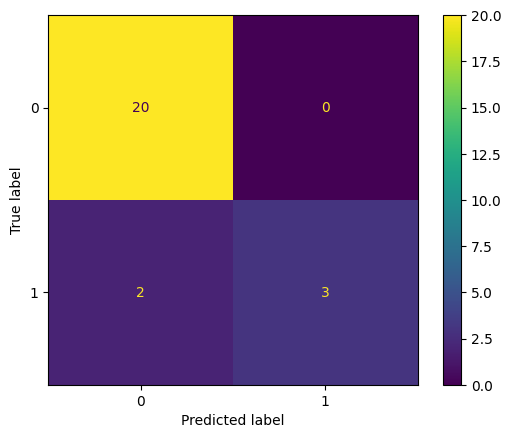

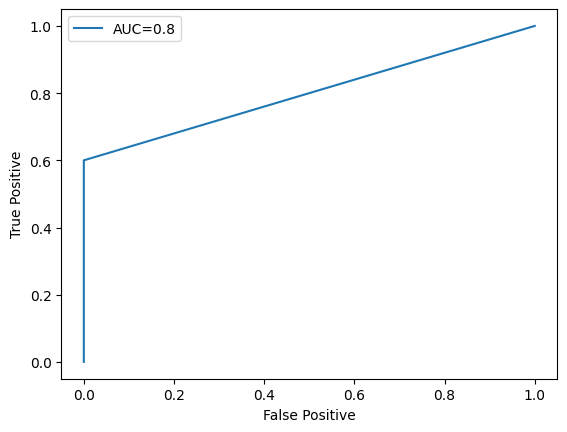

In [6]:
#2. С полученными параметрами вычислить метрики качества классификации (Confusion Matrix, ROC + AUC)
import matplotlib.pyplot as plt
y_test_predict = gridRf.predict(X_test)
y_test_prob = gridRf.predict_proba(X_test)[:,1]

confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

auc = roc_auc_score( y_test, y_test_predict )
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

## **4. Реализовать ансамбли моделей для задачи классификации и регрессии**

In [7]:
#1. Реализовать бэггинг BaggingClassifier на базе любой модели классификации
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# разделяем данные на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2 )

# создаем базовый алгоритм KNeighborsClassifier
base_model = KNeighborsClassifier()

# создаем ансамбль на основе базового алгоритма с использованием бэггинга
bagging_model = BaggingClassifier( estimator = base_model, n_estimators = 10, random_state = 42 )

# обучаем модель на обучающих данных
bagging_model.fit( X_train, y_train )

# делаем предсказания на тестовых данных
y_pred = bagging_model.predict( X_test )

In [8]:
# Вычислите метрики качества модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Выведите метрики качества модели
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.95
Precision: 1.0
Recall: 0.4444444444444444
F1 Score: 0.6153846153846153


In [9]:
#2. Реализовать бэггинг для задачи регрессии BaggingRegressor для любой модели регрессии
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# разделяем данные на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2 )

bagging_model = BaggingRegressor(estimator=base_model, n_estimators=5)

# обучаем модель на обучающих данных
bagging_model.fit( X_train, y_train )

# делаем предсказания на тестовых данных
y_pred = bagging_model.predict( X_test )

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Вычислите метрики качества модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выведите метрики качества модели
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 0.04300000000000001
Mean Absolute Error (MAE): 0.05600000000000001
Coefficient of Determination (R^2): 0.5325769413682995


In [11]:
#3. Реализовать меод градиентного бустинга GradiendBoostingClassifier на базе любой модели классификации 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# разделяем данные на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2 )

# создаем базовый алгоритм DecisionTreeClassifier
base_model = DecisionTreeClassifier()

boosting_model = GradientBoostingClassifier(n_estimators = 10, random_state = 42  )

# обучаем модель на обучающих данных
boosting_model.fit( X_train, y_train )

# делаем предсказания на тестовых данных
y_pred = boosting_model.predict( X_test )

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#вычисляем метрики качества модели, такие как точность (accuracy), точность (precision), полноту (recall) и F1-меру (F1 score), чтобы оценить производительность модели.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.975
Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8


In [13]:
#4. Реализовать меод градиентного бустинга GradiendBoostingRegressor на базе любой модели регрессии 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# разделяем данные на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2 )

boosting_model = GradientBoostingRegressor(n_estimators=100)

# обучаем модель на обучающих данных
boosting_model.fit( X_train, y_train )

# делаем предсказания на тестовых данных
y_pred = boosting_model.predict( X_test )

In [14]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выведите метрики качества модели
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 0.01974900156124396
Mean Absolute Error (MAE): 0.05100996625576684
Coefficient of Determination (R^2): 0.6629503733547697
